In [1]:
!pip install geopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [4]:
df_test = pd.read_csv("test.csv")
df_test.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian


In [5]:
df_train = df_train.replace('NaN', np.nan, regex=True)
null_counts = df_train.isnull().sum()
print(null_counts)

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64


In [6]:
df_test = df_test.replace('NaN', np.nan, regex=True)
null_counts_test = df_test.isnull().sum()
print(null_counts_test)

ID                               0
Delivery_person_ID               0
Delivery_person_Age            491
Delivery_person_Ratings        507
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                    444
Time_Order_picked                0
Weatherconditions              158
Road_traffic_density           154
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            238
Festival                        65
City                           324
dtype: int64


In [7]:
#join train n test to clean the data 
df = pd.concat([df_test.assign(indic="test"), df_train.assign(indic="train")])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56992 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           56992 non-null  object 
 1   Delivery_person_ID           56992 non-null  object 
 2   Delivery_person_Age          54647 non-null  object 
 3   Delivery_person_Ratings      54577 non-null  object 
 4   Restaurant_latitude          56992 non-null  float64
 5   Restaurant_longitude         56992 non-null  float64
 6   Delivery_location_latitude   56992 non-null  float64
 7   Delivery_location_longitude  56992 non-null  float64
 8   Order_Date                   56992 non-null  object 
 9   Time_Orderd                  54817 non-null  object 
 10  Time_Order_picked            56992 non-null  object 
 11  Weatherconditions            56218 non-null  object 
 12  Road_traffic_density         56237 non-null  object 
 13  Vehicle_conditio

In [9]:
#Removing the string part from Weatherconditions and min
df['Weatherconditions']=df['Weatherconditions'].str.split(" ", expand=True)[1]
df['Time_taken(min)']=df['Time_taken(min)'].str.split(" ", expand=True)[1]


In [10]:
#changing quantitative variables to float
num_cols = ['Delivery_person_Age','Delivery_person_Ratings','Vehicle_condition',
        'Time_taken(min)']
for col in num_cols:
    df[col]=df[col].astype('float64')

In [11]:
df['Order_Date']=pd.to_datetime(df['Order_Date'],format="%d-%m-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56992 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           56992 non-null  object        
 1   Delivery_person_ID           56992 non-null  object        
 2   Delivery_person_Age          54647 non-null  float64       
 3   Delivery_person_Ratings      54577 non-null  float64       
 4   Restaurant_latitude          56992 non-null  float64       
 5   Restaurant_longitude         56992 non-null  float64       
 6   Delivery_location_latitude   56992 non-null  float64       
 7   Delivery_location_longitude  56992 non-null  float64       
 8   Order_Date                   56992 non-null  datetime64[ns]
 9   Time_Orderd                  54817 non-null  object        
 10  Time_Order_picked            56992 non-null  object        
 11  Weatherconditions            56218 non-nu

In [13]:
cols=['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']
for col in cols:
    df[col]= abs(df[col])

In [14]:
from geopy.distance import geodesic 
import gc

df['distance']=np.zeros(len(df))
restaurant_cordinates_df=df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
delivery_location_cordinates_df=df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()

for i in range(len(df)):
    df['distance'].loc[i]=geodesic(restaurant_cordinates_df[i],delivery_location_cordinates_df[i])

C:\Users\divek\AppData\Local\Temp\ipykernel_67680\440899755.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'].loc[i]=geodesic(restaurant_cordinates_df[i],delivery_location_cordinates_df[i])


In [15]:
#converting geodisc to float
df['distance']=df['distance'].astype("str").str.extract('(\d+)')
df['distance']=df['distance'].astype("float64")

In [16]:
df['distance'].describe()


count    56992.000000
mean         9.244403
std          5.563173
min          1.000000
25%          4.000000
50%          9.000000
75%         13.000000
max         20.000000
Name: distance, dtype: float64

In [17]:
df['Time_Orderd']=pd.to_timedelta(df['Time_Orderd'])
df['Time_Order_picked']=pd.to_timedelta(df['Time_Order_picked'])


In [18]:
df['Time_Orderd']=pd.to_timedelta(df['Time_Orderd'])
df['Time_Order_picked']=pd.to_timedelta(df['Time_Order_picked'])

df['Time_Order_picked_formatted']=np.where(df['Time_Order_picked'] < df['Time_Orderd'], df['Order_Date'] + pd.DateOffset(1)+df['Time_Order_picked'], df['Order_Date']+df['Time_Order_picked'])
df['Time_Ordered_formatted'] = df['Order_Date']+ df['Time_Orderd']
df['order_preparation_time']=((df['Time_Order_picked_formatted']- df['Time_Ordered_formatted']).dt.total_seconds())/60

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56992 entries, 0 to 45592
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   ID                           56992 non-null  object         
 1   Delivery_person_ID           56992 non-null  object         
 2   Delivery_person_Age          54647 non-null  float64        
 3   Delivery_person_Ratings      54577 non-null  float64        
 4   Restaurant_latitude          56992 non-null  float64        
 5   Restaurant_longitude         56992 non-null  float64        
 6   Delivery_location_latitude   56992 non-null  float64        
 7   Delivery_location_longitude  56992 non-null  float64        
 8   Order_Date                   56992 non-null  datetime64[ns] 
 9   Time_Orderd                  54817 non-null  timedelta64[ns]
 10  Time_Order_picked            56992 non-null  timedelta64[ns]
 11  Weatherconditions           

In [22]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Type_of_vehicle,multiple_deliveries,Festival,City,indic,Time_taken(min),distance,Time_Order_picked_formatted,Time_Ordered_formatted,order_preparation_time
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,2022-03-30,NaT,...,electric_scooter,1,No,Metropolitian,test,NaN,6.0,2022-03-30 15:05:00,NaT,NaN
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,2022-03-29,0 days 20:30:00,...,motorcycle,1,No,Metropolitian,test,NaN,17.0,2022-03-29 20:35:00,2022-03-29 20:30:00,5.0
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,2022-03-10,0 days 19:35:00,...,motorcycle,1,No,Metropolitian,test,NaN,13.0,2022-03-10 19:45:00,2022-03-10 19:35:00,10.0
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,2022-04-02,0 days 17:15:00,...,scooter,1,No,Metropolitian,test,NaN,13.0,2022-04-02 17:20:00,2022-04-02 17:15:00,5.0
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,2022-03-27,0 days 18:25:00,...,scooter,1,No,Metropolitian,test,NaN,17.0,2022-03-27 18:40:00,2022-03-27 18:25:00,15.0


In [23]:
#filling missing values with SimpleImputer and ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [24]:
cat_attribs = ['Weatherconditions','Road_traffic_density', 'Type_of_order','Type_of_vehicle','Festival','City','indic']
num_attribs = ['Delivery_person_Age','Delivery_person_Ratings','Vehicle_condition','distance','Time_taken(min)','order_preparation_time','multiple_deliveries']

In [25]:
numerical_transformer = SimpleImputer(strategy = 'median')
categorical_transformer = SimpleImputer(strategy = 'most_frequent')

preprocessor = ColumnTransformer( transformers = [
    ('num',numerical_transformer,num_attribs),
    ('cat',categorical_transformer,cat_attribs)
])

df_cleant = pd.DataFrame(preprocessor.fit_transform(df), columns = ['Delivery_person_Age','Delivery_person_Ratings',
                                                                    'Vehicle_condition','distance','Time_taken(min)',
                                                                    'order_preparation_time','multiple_deliveries',
                                                                    'Weatherconditions','Road_traffic_density', 
                                                                    'Type_of_order',
                                                                    'Type_of_vehicle','Festival','City','indic'] )
df_cleant.isnull().sum()

Delivery_person_Age        0
Delivery_person_Ratings    0
Vehicle_condition          0
distance                   0
Time_taken(min)            0
order_preparation_time     0
multiple_deliveries        0
Weatherconditions          0
Road_traffic_density       0
Type_of_order              0
Type_of_vehicle            0
Festival                   0
City                       0
indic                      0
dtype: int64

In [26]:
for col in num_attribs:
    df_cleant[col]=df_cleant[col].astype('float64')
df_cleant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56992 entries, 0 to 56991
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      56992 non-null  float64
 1   Delivery_person_Ratings  56992 non-null  float64
 2   Vehicle_condition        56992 non-null  float64
 3   distance                 56992 non-null  float64
 4   Time_taken(min)          56992 non-null  float64
 5   order_preparation_time   56992 non-null  float64
 6   multiple_deliveries      56992 non-null  float64
 7   Weatherconditions        56992 non-null  object 
 8   Road_traffic_density     56992 non-null  object 
 9   Type_of_order            56992 non-null  object 
 10  Type_of_vehicle          56992 non-null  object 
 11  Festival                 56992 non-null  object 
 12  City                     56992 non-null  object 
 13  indic                    56992 non-null  object 
dtypes: float64(7), object(

In [27]:
#While filling the missing values the target feature - Time_taken(min) in the test dataset also got filled with the median value. This will lead to misleading Data visualisations hence I am converting it back to NaN values. There are totally 11399 columns in the test dataset.
df_cleant.loc[(df_cleant.indic == 'test') , 'Time_taken(min)'] = np.nan 

In [28]:
df_cleant.isnull().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Vehicle_condition              0
distance                       0
Time_taken(min)            11399
order_preparation_time         0
multiple_deliveries            0
Weatherconditions              0
Road_traffic_density           0
Type_of_order                  0
Type_of_vehicle                0
Festival                       0
City                           0
indic                          0
dtype: int64

In [29]:
df_cleant.describe()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,distance,Time_taken(min),order_preparation_time,multiple_deliveries
count,56992.000000,56992.000000,56992.000000,56992.000000,45593.000000,56992.000000,56992.000000
mean,29.575397,4.636396,1.024968,9.244403,26.294607,9.998684,0.751158
std,5.691393,0.329666,0.839171,5.563173,9.383806,4.007711,0.567695
min,15.000000,1.000000,0.000000,1.000000,10.000000,5.000000,0.000000
25%,25.000000,4.600000,0.000000,4.000000,19.000000,5.000000,0.000000
50%,30.000000,4.700000,1.000000,9.000000,26.000000,10.000000,1.000000
75%,34.000000,4.800000,2.000000,13.000000,32.000000,15.000000,1.000000
max,50.000000,6.000000,3.000000,20.000000,54.000000,15.000000,3.000000


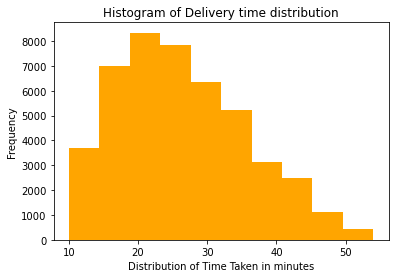

In [30]:
#visualising the target variable
fig, ax= plt.subplots()

plt.hist(df_cleant['Time_taken(min)'],color = 'Orange')
plt.xlabel('Distribution of Time Taken in minutes')
plt.ylabel('Frequency')
plt.title("Histogram of Delivery time distribution")
plt.show()
#The distribution rises fast, peaks between 20 and 30 mins and then falls slowly.

C:\Users\divek\AppData\Local\Temp\ipykernel_67680\4183621311.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


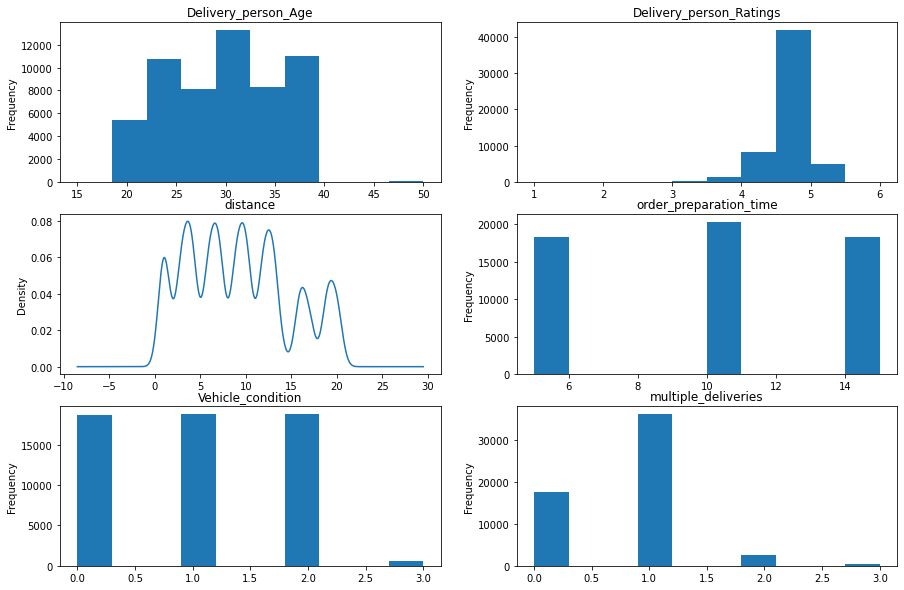

In [31]:
# visualising the numerical columns 
fig, axes = plt.subplots(3,2, figsize = (15,10))

df_cleant['Delivery_person_Age'].plot(kind = 'hist', ax = axes[0,0], title = 'Delivery_person_Age')
df_cleant['Delivery_person_Ratings'].plot(kind = 'hist', ax = axes[0,1], title = 'Delivery_person_Ratings')
df_cleant['distance'].plot(kind = 'kde', ax = axes[1,0] , title = 'distance')
df_cleant['order_preparation_time'].plot(kind = 'hist', ax = axes[1,1], title = 'order_preparation_time')
df_cleant['Vehicle_condition'].plot(kind = 'hist', ax = axes[2,0], title = 'Vehicle_condition')
df_cleant['multiple_deliveries'].plot(kind = 'hist', ax = axes[2,1], title = 'multiple_deliveries')
fig.show()

In [32]:
df_cleant.describe(include = "O").T

,count,unique,top,freq
Weatherconditions,56992,6,Fog,10196
Road_traffic_density,56992,4,Low,20113
Type_of_order,56992,4,Snack,14348
Type_of_vehicle,56992,4,motorcycle,33044
Festival,56992,2,No,55893
City,56992,3,Metropolitian,44114
indic,56992,2,train,45593


In [33]:
df_cleant.describe(include = "O")

,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City,indic
count,56992,56992,56992,56992,56992,56992,56992
unique,6,4,4,4,2,3,2
top,Fog,Low,Snack,motorcycle,No,Metropolitian,train
freq,10196,20113,14348,33044,55893,44114,45593


C:\Users\divek\AppData\Local\Temp\ipykernel_67680\1777056958.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


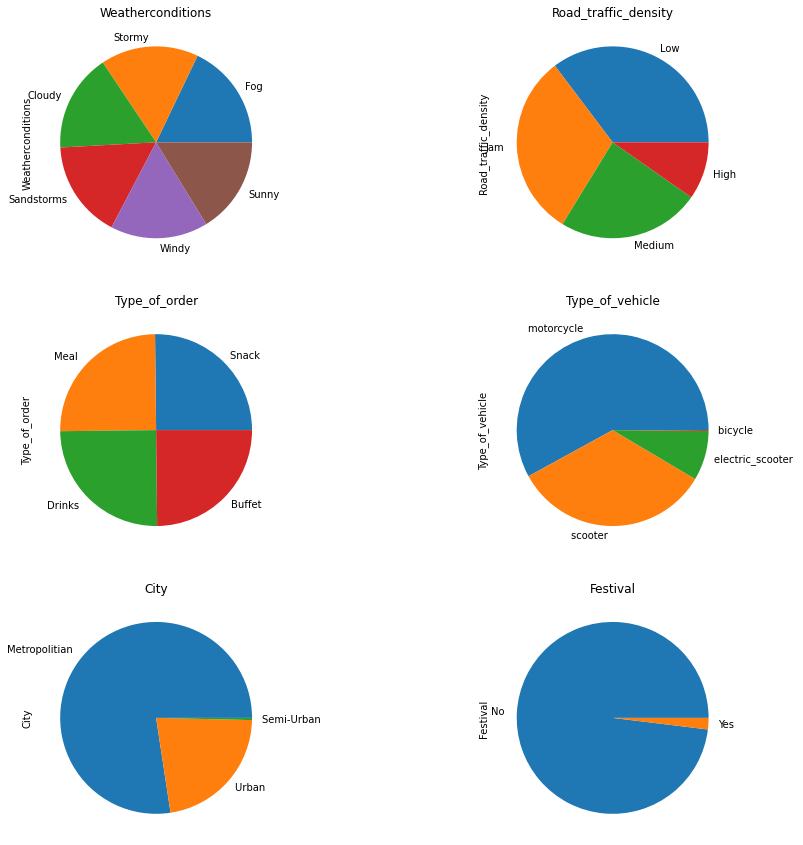

In [34]:
#univariate categorical data
fig, axes = plt.subplots(3,2, figsize = (15,15))

df_cleant['Weatherconditions'].value_counts().plot(kind = 'pie', ax = axes[0,0], title = 'Weatherconditions')
df_cleant['Road_traffic_density'].value_counts().plot(kind = 'pie', ax = axes[0,1], title = 'Road_traffic_density')
df_cleant['Type_of_order'].value_counts().plot(kind = 'pie', ax = axes[1,0], title = 'Type_of_order')
df_cleant['Type_of_vehicle'].value_counts().plot(kind = 'pie', ax = axes[1,1], title = 'Type_of_vehicle')
df_cleant['Festival'].value_counts().plot(kind = 'pie', ax = axes[2,1], title = 'Festival')
df_cleant['City'].value_counts().plot(kind = 'pie', ax = axes[2,0], title = 'City')


fig.show()

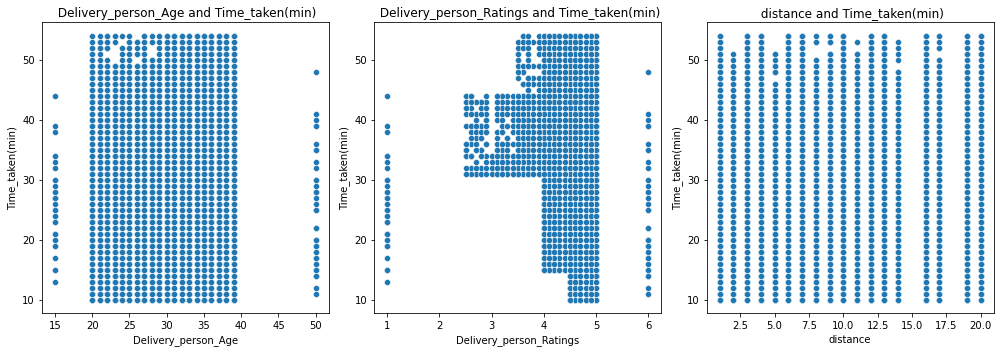

In [39]:
#relationship between timetaken and Continuous data
cols = ['Delivery_person_Age', 'Delivery_person_Ratings', 'distance']

# Plotting scatter plots for each predictor against Time_taken(min)
plt.figure(figsize=(14, 5))
for i, col in enumerate(cols):
    plt.subplot(1, len(cols), i+1)
    sns.scatterplot(x=col, y='Time_taken(min)', data=df_cleant)
    plt.title(f' {col} and Time_taken(min)')
    plt.xlabel(col)
    plt.ylabel('Time_taken(min)')

plt.tight_layout()
plt.show()

C:\Users\divek\AppData\Local\Temp\ipykernel_67680\3841485678.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


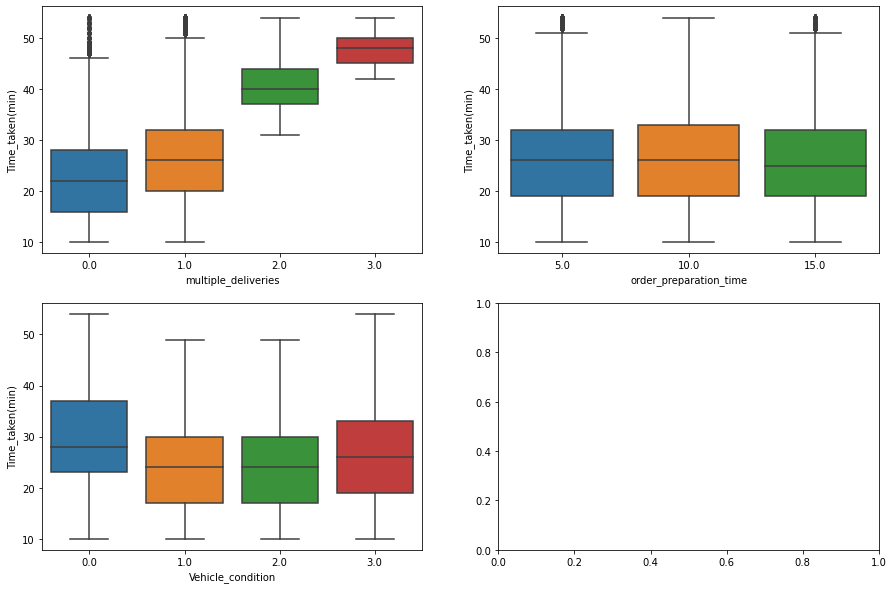

In [40]:
#relationship between time taken and discrete variables
fig,axes = plt.subplots(2,2, figsize=(15,10))

sns.boxplot(data=df_cleant,x ='multiple_deliveries',y='Time_taken(min)', ax=axes[0,0])
sns.boxplot(data=df_cleant,x ='Vehicle_condition',y='Time_taken(min)', ax=axes[1,0])
sns.boxplot(data=df_cleant,x ='order_preparation_time',y='Time_taken(min)', ax=axes[0,1])

fig.show()

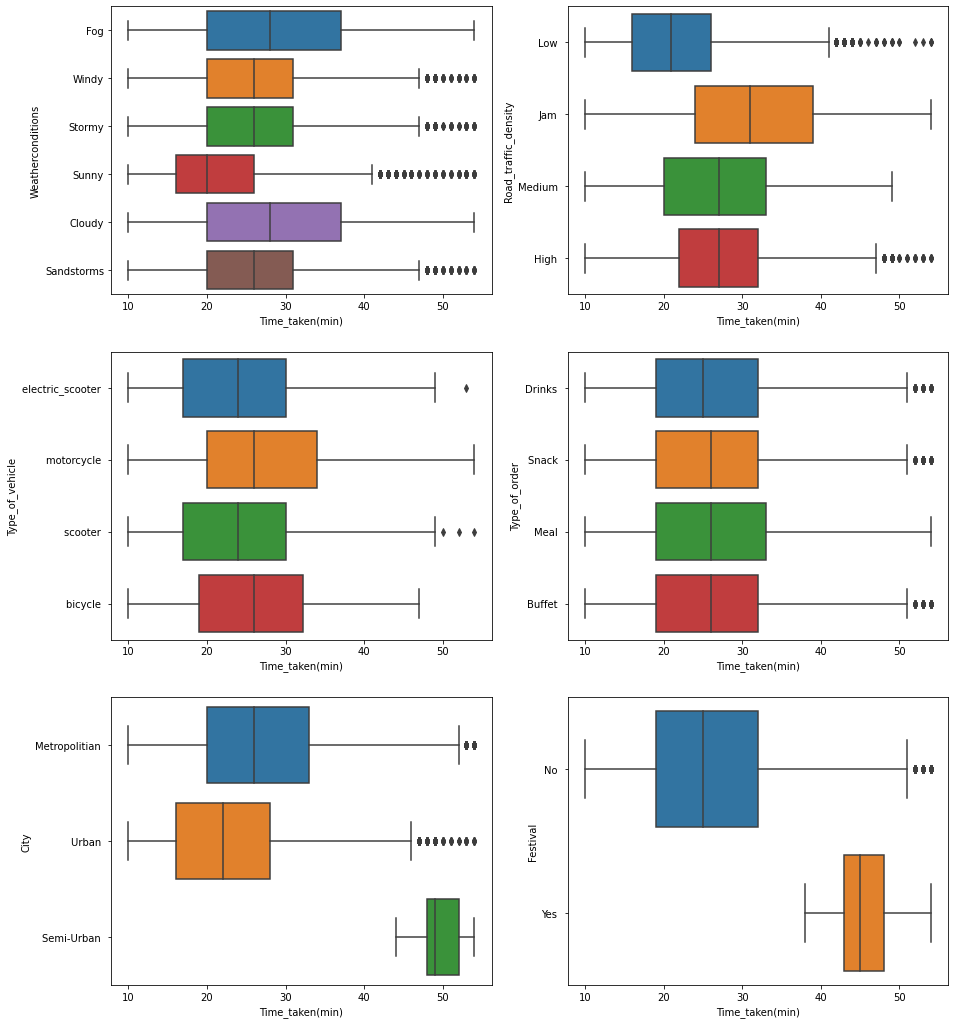

In [41]:
#relationship between time taken and categorical variables
fig,axes = plt.subplots(3,2, figsize=(15,18))

sns.boxplot(data=df_cleant,y = 'Weatherconditions', x ='Time_taken(min)', ax=axes[0,0])
sns.boxplot(data=df_cleant,y ='Road_traffic_density',x='Time_taken(min)', ax=axes[0,1])
sns.boxplot(data=df_cleant,y= 'Type_of_order',x = 'Time_taken(min)',ax=axes[1,1])
sns.boxplot(data=df_cleant,y = 'Type_of_vehicle',x = 'Time_taken(min)',ax=axes[1,0])
sns.boxplot(data=df_cleant,y= 'Festival',x = 'Time_taken(min)',ax=axes[2,1])
sns.boxplot(data=df_cleant,y = 'City',x = 'Time_taken(min)',ax=axes[2,0])
plt.show()

<AxesSubplot:>

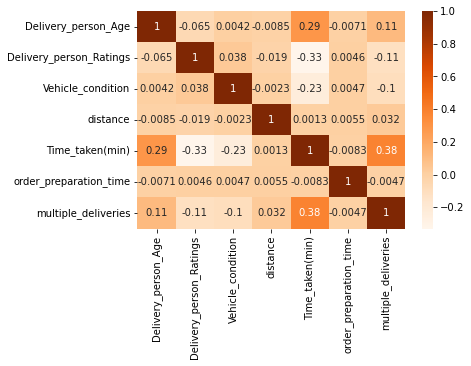

In [42]:
#correlation heatmap

#pal= sns.diverging_palette(250, 30, as_cmap=True)
sns.heatmap(df_cleant.corr(), cmap='Oranges', annot = True)

In [52]:
#converting to binary using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown = 'ignore', drop = 'first',sparse = False)

to_binary_cols = df_cleant[['Weatherconditions','Road_traffic_density', 'Type_of_order',
              'Type_of_vehicle','Festival','City']]

df_binary = pd.DataFrame(OH_encoder.fit_transform(to_binary_cols), 
                         columns = ['Fog', 'Sandstorms', 'Stormy', 'Sunny', 'Windy', 'Jam ', 
                                    'Low ', 'Medium ','Drinks ', 'Meal ', 'Snack ','electric_scooter ', 
                                    'motorcycle ', 'scooter ','festival','Semi-Urban ', 'Urban '])
OH_encoder.categories_

[array(['Cloudy', 'Fog', 'Sandstorms', 'Stormy', 'Sunny', 'Windy'],
       dtype=object),
 array(['High ', 'Jam ', 'Low ', 'Medium '], dtype=object),
 array(['Buffet ', 'Drinks ', 'Meal ', 'Snack '], dtype=object),
 array(['bicycle ', 'electric_scooter ', 'motorcycle ', 'scooter '],
       dtype=object),
 array(['No ', 'Yes '], dtype=object),
 array(['Metropolitian ', 'Semi-Urban ', 'Urban '], dtype=object)]

In [53]:
df_binary.head()

,Fog,Sandstorms,Stormy,Sunny,Windy,Jam,Low,Medium,Drinks,Meal,Snack,electric_scooter,motorcycle,scooter,festival,Semi-Urban,Urban
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [54]:
df_num = df_cleant[['Delivery_person_Age','Delivery_person_Ratings','Vehicle_condition',
                   'distance','Time_taken(min)','order_preparation_time','indic','multiple_deliveries']]

In [55]:
df_transformed = pd.concat([df_num,df_binary], axis = 1)
df_transformed.head()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,distance,Time_taken(min),order_preparation_time,indic,multiple_deliveries,Fog,Sandstorms,...,Medium,Drinks,Meal,Snack,electric_scooter,motorcycle,scooter,festival,Semi-Urban,Urban
0,30.0,4.7,3.0,6.0,NaN,10.0,test,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,28.0,4.6,0.0,17.0,NaN,5.0,test,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,23.0,4.5,0.0,13.0,NaN,10.0,test,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,21.0,4.8,1.0,13.0,NaN,5.0,test,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,31.0,4.6,2.0,17.0,NaN,15.0,test,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [56]:
 test, train = df_transformed[df_transformed["indic"].eq("test")], df_transformed[df_transformed["indic"].eq("train")]

In [57]:
train = pd.DataFrame(df_transformed[df_transformed["indic"].eq("train")])
test = pd.DataFrame(df_transformed[df_transformed["indic"].eq("test")])


In [58]:
train.drop(['indic'], axis = 1, inplace = True)
test.drop(['indic','Time_taken(min)'], axis = 1, inplace = True)

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45593 entries, 11399 to 56991
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      45593 non-null  float64
 1   Delivery_person_Ratings  45593 non-null  float64
 2   Vehicle_condition        45593 non-null  float64
 3   distance                 45593 non-null  float64
 4   Time_taken(min)          45593 non-null  float64
 5   order_preparation_time   45593 non-null  float64
 6   multiple_deliveries      45593 non-null  float64
 7   Fog                      45593 non-null  float64
 8   Sandstorms               45593 non-null  float64
 9   Stormy                   45593 non-null  float64
 10  Sunny                    45593 non-null  float64
 11  Windy                    45593 non-null  float64
 12  Jam                      45593 non-null  float64
 13  Low                      45593 non-null  float64
 14  Medium            

In [60]:
X = train.drop(['Time_taken(min)'], axis = 1)
y = train['Time_taken(min)']

In [61]:
X.shape , y.shape

((45593, 23), (45593,))

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 16)

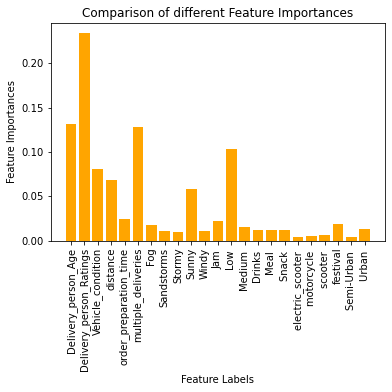

In [63]:
#Feature Selection¶
#Random Forest
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor( criterion = 'squared_error', random_state = 7)
rf.fit(X_train, y_train)

feature_importance = rf.feature_importances_
plt.bar(X.columns, feature_importance, color = 'orange')
plt.xticks(rotation = 'vertical')
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [64]:
#using select from model
from sklearn.feature_selection import SelectFromModel

rf_selector = SelectFromModel(estimator=RandomForestRegressor())
rf_selector.fit(X_train, y_train)
X.columns[rf_selector.get_support()]

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'distance', 'multiple_deliveries', 'Sunny', 'Low '],
      dtype='object')

In [65]:
#Features with higher importance scores are considered more relevant for the model
#delivery_person_ratings,delivery_person_age,multiple deliveries,Vehicle_condition,low,sunny,distance

In [66]:
#Coefficient Shrinkage: Lasso regression shrinks the coefficients of less important features to exactly zero. This property makes it useful for feature selection as it effectively performs variable selection by excluding features with zero coefficients.
#Selection Process: After fitting a Lasso model, you can select features whose coefficients are non-zero. These features are considered relevant for predicting the target variable.

In [67]:
#Fisher's score
rf = RandomForestRegressor(random_state=8)
rf.fit(X_train, y_train)

# Get feature importances for training data
train_feature_importances = rf.feature_importances_

# Get column names from X_train
feature_names = X_train.columns

# Calculate Fisher's score (simplified example)
# In this case, we can use normalized feature importances as a heuristic for Fisher's score
train_fisher_scores = train_feature_importances / np.sum(train_feature_importances)

# Print or use train_fisher_scores as needed with feature names
print("Fisher Scores (Feature Importances) for Training Data:")
for i, (feature_name, score) in enumerate(zip(feature_names, train_fisher_scores)):
    print(f"{feature_name} = {score}")

Fisher Scores (Feature Importances) for Training Data:
Delivery_person_Age = 0.1304404306136688
Delivery_person_Ratings = 0.23342644793981748
Vehicle_condition = 0.08119265880359006
distance = 0.0678492950297609
order_preparation_time = 0.023779228168063483
multiple_deliveries = 0.12828672995503215
Fog = 0.0173222712399699
Sandstorms = 0.010899443574020371
Stormy = 0.009934116597576873
Sunny = 0.058399367931806195
Windy = 0.010736057761726139
Jam  = 0.02279246529576474
Low  = 0.10403108694077677
Medium  = 0.014935872432731076
Drinks  = 0.011679414740154331
Meal  = 0.011712983501656614
Snack  = 0.011715441606538096
electric_scooter  = 0.003950997811117688
motorcycle  = 0.0055839716325063495
scooter  = 0.005854995181255921
festival = 0.018273586967650277
Semi-Urban  = 0.004355727240519267
Urban  = 0.012847409034296531


In [68]:
#Delivery_person_Age ,multiple_deliveries ,Low  ,Delivery_person_Ratings ,Vehicle_condition ,Sunny,Urban  ,Jam  

In [73]:
#Using LassoCv to find the best alpha
from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv = 10)

lassocv.fit(X_train, y_train)
alpha = lassocv.alpha_
print("Best alpha :", alpha)

Best alpha : 0.015667816095909375


Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'distance', 'order_preparation_time', 'multiple_deliveries', 'Fog',
       'Sandstorms', 'Stormy', 'Sunny', 'Windy', 'Jam ', 'Low ', 'Medium ',
       'electric_scooter ', 'scooter ', 'festival', 'Semi-Urban ', 'Urban '],
      dtype='object')


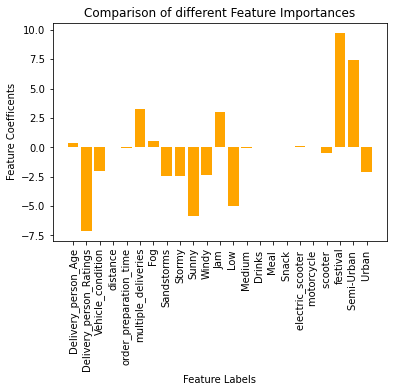

In [74]:
#Lasso 
from sklearn.linear_model import Lasso

lasso_selector = SelectFromModel(Lasso(alpha = 0.0155, random_state = 34))
lasso_selector.fit(X_train, y_train)
print(X.columns[lasso_selector.get_support()])

coefs = lassocv.coef_
plt.bar(X_train.columns, coefs, color = 'orange')
plt.xticks(rotation = 'vertical')
plt.xlabel('Feature Labels')
plt.ylabel('Feature Coefficents')
plt.title('Comparison of different Feature Importances')
plt.show()

In [75]:
#non zero-multiple deliveries,jam,festival,semi-urban,delivery perosn age,fog

In [76]:
#Select top 7 features based on mutual info regression
from sklearn.feature_selection import SelectKBest, mutual_info_regression

selector = SelectKBest(mutual_info_regression, k =5)
selector.fit(X_train, y_train)
X.columns[selector.get_support()]

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'multiple_deliveries',
       'Jam ', 'Low '],
      dtype='object')

In [77]:
# Based on the above two, we can select 8 common features:
#Delivery_person_Age
# Delivery person ratings
# multiple deliveries
# Low
# vehicle condition
# Festival
# Delivery person age


In [84]:
X_train

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Jam,Low,festival
20086,39.0,4.6,0.0,1.0,0.0,0.0,0.0
28108,27.0,2.7,2.0,1.0,0.0,1.0,0.0
21894,34.0,4.7,0.0,1.0,0.0,0.0,1.0
15739,36.0,4.7,1.0,1.0,1.0,0.0,0.0
20491,22.0,4.5,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
48715,30.0,4.6,0.0,1.0,0.0,0.0,0.0
44802,38.0,5.0,0.0,2.0,1.0,0.0,1.0
44748,32.0,4.9,2.0,1.0,1.0,0.0,0.0
13568,31.0,4.5,0.0,0.0,0.0,1.0,0.0


In [79]:
X_train.drop([ 'Fog', 'Sandstorms', 'Stormy','Windy', 'Sunny',
            'Medium ','Drinks ', 'Meal ', 'Snack ','electric_scooter ', 'motorcycle ', 
            'scooter ','Semi-Urban ','distance','order_preparation_time'], 
             axis = 1, inplace = True)
X_train.shape , y_train.shape

((27355, 8), (27355,))

In [80]:
X_train.drop(['Urban '],axis=1,inplace=True)


In [81]:
X_train.shape , y_train.shape

((27355, 7), (27355,))

In [82]:
X_test.drop([  'Fog', 'Sandstorms', 'Stormy','Windy', 'Sunny',
            'Medium ','Drinks ', 'Meal ', 'Snack ','electric_scooter ', 'motorcycle ', 
            'scooter ','Semi-Urban ','distance','order_preparation_time'], 
             axis = 1, inplace = True)
X_test.shape , y_test.shape

((18238, 8), (18238,))

In [83]:
X_test.drop(['Urban '],axis=1,inplace=True)
X_test.shape , y_test.shape

((18238, 7), (18238,))

Building Models¶
Multiple Linear Regression
Decision Trees
Random Forests
AdaBoost
K Nearest Neighbours

In [85]:
test_mse = []
train_mse = []

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X_train, y_train)
train_mse.append(mean_squared_error(y_train, reg.predict(X_train)))
test_mse.append(mean_squared_error(y_test, reg.predict(X_test)))

In [87]:
print("Intercept", reg.intercept_ )

for i in zip(X_train.columns, reg.coef_):
    print(i)
    
print("R-squared", reg.score(X_train,y_train))    

Intercept 48.046149868518036
('Delivery_person_Age', 0.39833795899590657)
('Delivery_person_Ratings', -7.2707129251155145)
('Vehicle_condition', -2.0673751569016487)
('multiple_deliveries', 3.7765264253638646)
('Jam ', 3.1056237688934316)
('Low ', -4.9324307109438)
('festival', 11.690075929157922)
R-squared 0.4826304013277636


Text(0, 0.5, 'residuals')

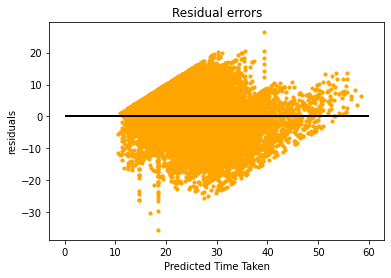

In [88]:
#Residual Plot
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "orange", s = 10, label = "Test Data")
plt.hlines(y = 0, xmin = 0, xmax = 60, linewidth = 2, color = 'k')
plt.title("Residual errors")
plt.xlabel("Predicted Time Taken")
plt.ylabel("residuals")

In [89]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(criterion = 'squared_error',random_state = 1)
dtree.fit(X_train,y_train)
print("Tree Depth",dtree.get_depth())
print("Terminal Nodes", dtree.get_n_leaves())
train_mse.append(mean_squared_error(y_train, dtree.predict(X_train)))
test_mse.append(mean_squared_error(y_test, dtree.predict(X_test)))

Tree Depth 24
Terminal Nodes 4894


In [90]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2,4,6,8,10,12,16,20],
    'max_leaf_nodes': [6,10,15,20,30,50,70]
    }
    
    
dtree_grid_search = GridSearchCV(dtree, param_grid=param_grid,
                              cv = 5, scoring = 'neg_mean_squared_error',
                              return_train_score = True )
dtree_grid_search.fit(X_train, y_train)
dtree_grid_search.best_params_
print(dtree_grid_search.best_estimator_)

DecisionTreeRegressor(max_depth=8, max_leaf_nodes=70, random_state=1)


In [91]:
#Decision Trees after pruning
dtree_pruned = DecisionTreeRegressor(max_depth=10, max_leaf_nodes=70,
                                     criterion = 'squared_error',random_state = 1)
dtree_pruned.fit(X_train,y_train)
#print(dtree.get_depth())
#print(dtree.get_n_leaves())
train_mse.append(mean_squared_error(y_train, dtree_pruned.predict(X_train)))
test_mse.append(mean_squared_error(y_test, dtree_pruned.predict(X_test)))

In [92]:
#RandomForest
rf_reg = RandomForestRegressor(criterion = 'squared_error', random_state = 5)
rf_reg.fit(X_train,y_train)
print(rf_reg.get_params(deep=True))
train_mse.append(mean_squared_error(y_train, rf_reg.predict(X_train)))
test_mse.append(mean_squared_error(y_test, rf_reg.predict(X_test)))

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 5, 'verbose': 0, 'warm_start': False}


In [93]:
#Hypertunning Random Forest, this code takes about 2 mins to run
param_grid = {
    'max_depth': [2,4,6,8,10,12],
    'max_features': ['sqrt', 'log2', None],
}

rf_grid_search = GridSearchCV(rf_reg, param_grid=param_grid,
                              cv = 5, scoring = 'neg_mean_squared_error',
                              return_train_score = True )
rf_grid_search.fit(X_train, y_train)
rf_grid_search.best_params_

{'max_depth': 8, 'max_features': None}

In [94]:
#RandomForest with hypertuned parameters
rf_cv = RandomForestRegressor(max_depth = 8, max_features = None, random_state = 5)
rf_cv.fit(X_train, y_train)
train_mse.append(mean_squared_error(y_train, rf_cv.predict(X_train)))
test_mse.append(mean_squared_error(y_test, rf_cv.predict(X_test)))

C:\Users\divek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\divek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mean squared error by model')

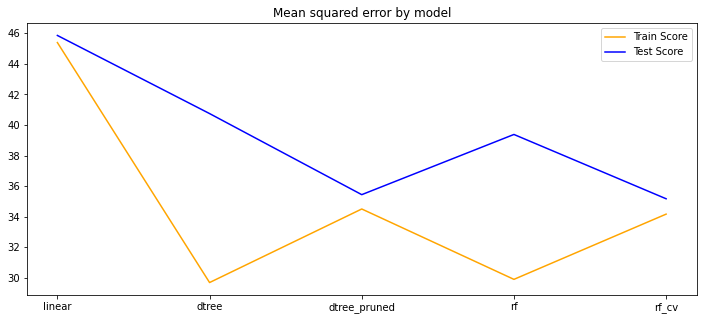

In [95]:
plt.figure(figsize=(12,5))
sns.lineplot(['linear','dtree','dtree_pruned','rf','rf_cv'],train_mse,label='Train Score', color = 'Orange')
sns.lineplot(['linear','dtree','dtree_pruned','rf','rf_cv'],test_mse,label='Test Score', color = 'Blue')
plt.title("Mean squared error by model")

In [96]:
methods = ['linear', 'dtree', 'dtree_pruned', 'rf', 'rf_cv']
mse_data = {
    'Method': methods,
    'Train MSE': train_mse,
    'Test MSE': test_mse
}
mse_df = pd.DataFrame(mse_data)

# Display the MSE table
print("Mean Squared Error (MSE) by Model:")
print(mse_df)

Mean Squared Error (MSE) by Model:
         Method  Train MSE   Test MSE
0        linear  45.394865  45.860002
1         dtree  29.686422  40.746305
2  dtree_pruned  34.500937  35.439211
3            rf  29.894493  39.379055
4         rf_cv  34.164175  35.169980
